In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Структурный элемент

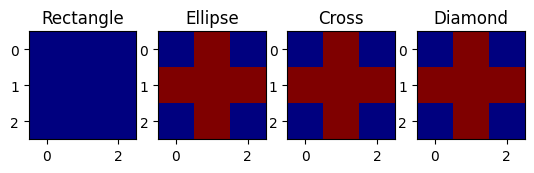

Прямоугольное ядро:
[[1 1 1]
 [1 1 1]
 [1 1 1]]

Эллиптическое ядро:
[[0 1 0]
 [1 1 1]
 [0 1 0]]

Крестообразное ядро:
[[0 1 0]
 [1 1 1]
 [0 1 0]]

Ромбовидное ядро:
[[0 1 0]
 [1 1 1]
 [0 1 0]]


In [12]:
n = 3
shape = (n, n)

# Прямоугольное ядро 3x3
kernel_rect = np.ones(shape, np.uint8)

# Эллиптическое ядро
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, shape)

# Крестообразное ядро
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, shape)

# Ромбовидное ядро
kernel_diamond = cv2.getStructuringElement(cv2.MORPH_DIAMOND, shape)

kernels = [kernel_rect, kernel_ellipse, kernel_cross, kernel_diamond]
titles = ["Rectangle", "Ellipse", "Cross", "Diamond"]

plt.subplots(1, 4)
for i, kernel in enumerate(kernels):
    plt.subplot(1, 4, i + 1)
    plt.imshow(kernel, cmap='jet')
    plt.title(titles[i])
plt.show()

print("Прямоугольное ядро:")
print(kernel_rect)
print("\nЭллиптическое ядро:")
print(kernel_ellipse)
print("\nКрестообразное ядро:")
print(kernel_cross)
print("\nРомбовидное ядро:")
print(kernel_diamond)

Морфологические операции

In [30]:
def morph_change(image, kernel, morph_operation):
    print(image.shape)
    # Получаем размеры
    img_height, img_width = image.shape
    k_height, k_width = kernel.shape
    k_center_y, k_center_x = k_height // 2, k_width // 2

    # Создаем выходное изображение
    result = np.zeros_like(image)

    # Проходим по каждому пикселю изображения
    for y in range(k_center_y, img_height - k_center_y):
        for x in range(k_center_x, img_width - k_center_x):
            # применяем морфологическую операцию
            morph_operation(y, x, image, kernel, result)
    return result

Эрозия (Erosion)

In [16]:
def erosion(y, x, image, kernel, result):
    k_height, k_width = kernel.shape
    k_center_y, k_center_x = k_height // 2, k_width // 2
    match = True
    for ky in range(k_height):
        for kx in range(k_width):
            # Если в ядре 1, то соответствующий пиксель должен быть белым
            if kernel[ky, kx] == 1:
                img_y = y + ky - k_center_y
                img_x = x + kx - k_center_x
                if image[img_y, img_x] == 0:  # Если нашли черный пиксель
                    match = False
                    break
        if not match:
            break
    # Если все пиксели совпали, ставим белый
    result[y, x] = 255 if match else 0



Размытие

In [31]:
def dilation(y, x, image, kernel, result):
    k_height, k_width = kernel.shape
    k_center_y, k_center_x = k_height // 2, k_width // 2
    match = False
    # Проверяем все пиксели в области ядра
    for ky in range(k_height):
        for kx in range(k_width):
            # Если в ядре 1 и соответствующий пиксель белый
            if kernel[ky, kx] == 1:
                img_y = y + ky - k_center_y
                img_x = x + kx - k_center_x
                if image[img_y, img_x] == 255:  # Если нашли белый пиксель
                    match = True
                    break
        if match:
            break

    # Если нашли хотя бы один белый пиксель, ставим белый
    result[y, x] = 255 if match else 0

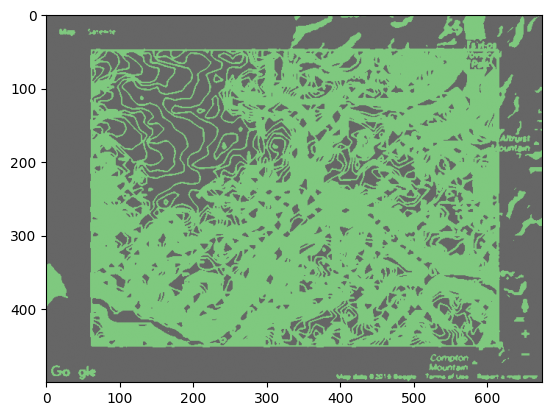

In [46]:
image = cv2.imread('Contour.jpg')
if len(image.shape) == 3:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    gray = image.copy()

# Размытие для уменьшения шума
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Бинаризация (пороговая обработка)
_, binary = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV)
plt.imshow(~binary, cmap='Accent')


In [43]:
binary.shape

(500, 675)

(500, 675)


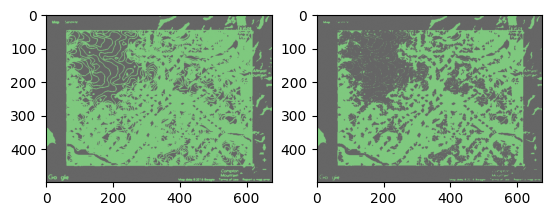

In [51]:
shape = (3, 3)
result_erosion = morph_change(binary, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, shape), erosion)
plt.subplot(1,2,1)
plt.imshow(~binary, cmap='Accent')
plt.subplot(1,2,2)
plt.imshow(~result_erosion, cmap='Accent')

Размытие

(500, 675)


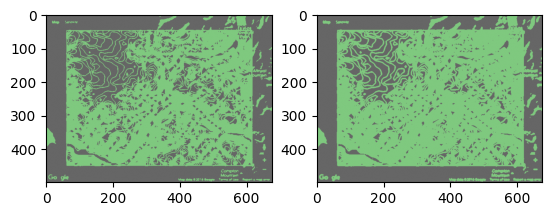

In [52]:
shape = (3, 3)
result_dilation = morph_change(binary, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, shape), dilation)
plt.subplot(1,2,1)
plt.imshow(~binary, cmap='Accent')
plt.subplot(1,2,2)
plt.imshow(~result_dilation, cmap='Accent')

Открытие

(500, 675)


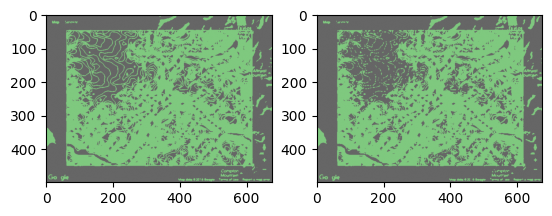

In [54]:
shape = (3, 3)
result_opening = morph_change(result_erosion, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, shape), dilation)
plt.subplot(1,2,1)
plt.imshow(~binary, cmap='Accent')
plt.subplot(1,2,2)
plt.imshow(~result_opening, cmap='Accent')

Закрытие

(500, 675)


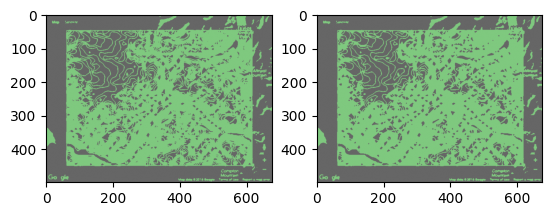

In [55]:
shape = (3, 3)
result_opening = morph_change(result_dilation, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, shape), erosion)
plt.subplot(1,2,1)
plt.imshow(~binary, cmap='Accent')
plt.subplot(1,2,2)
plt.imshow(~result_opening, cmap='Accent')